In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/My Drive/ECE219/Project4'

Mounted at /content/gdrive
/content/gdrive/My Drive/ECE219/Project4


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import os, re, csv, json, datetime

from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import f_regression
from sklearn.pipeline import Pipeline

import joblib
from google.colab import files

In [ ]:
def Var_sav(var):
  joblib.dump(var,  f'{var}.pkl') 

def Var_dl(var):
  return joblib.load(f'{var}.pkl') 

### Q9.1

#### Gohawks

In [ ]:
Gohawks = []
with open("./tweets_#gohawks.txt",'r') as f:
  for line in f:
    Gohawks.append(json.loads(line))

Gohawks_num = len(Gohawks)
Gohawks_time = []
Gohawks_followers_sum = 0
Gohawks_retweets_sum = 0

for item in Gohawks:
  Gohawks_time.append(item['citation_date'])

  Gohawks_followers_sum = Gohawks_followers_sum + item['author']['followers']

  Gohawks_retweets_sum = Gohawks_retweets_sum + item['metrics']['citations']['total']

Gohawks_avg_tw_per_hour = float(Gohawks_num) / (max(Gohawks_time) - min(Gohawks_time))
Gohawks_avg_followers = float(Gohawks_followers_sum) / float(Gohawks_num)
Gohawks_avg_retweets = float(Gohawks_retweets_sum)/float(Gohawks_num)

print('Average number of tweets per hour:', Gohawks_avg_tw_per_hour * 3600)
print('Average number of followers of users posting the tweets per tweet: ', Gohawks_avg_followers)
print('Average number of retweets per tweet: ' ,Gohawks_avg_retweets)

Average number of tweets per hour: 292.48785062173687
Average number of followers of users posting the tweets per tweet:  2217.9237355281984
Average number of retweets per tweet:  2.0132093991319877


##### Gopatriots

In [ ]:
Gopatriots = []
with open("./tweets_#gopatriots.txt",'r') as f:
  for line in f:
    Gopatriots.append(json.loads(line))

Gopatriots_num = len(Gopatriots)
Gopatriots_time = []

Gopatriots_followers_sum = 0
Gopatriots_retweets_sum = 0

for item in Gopatriots:
  Gopatriots_time.append(item['citation_date'])

  Gopatriots_followers_sum = Gopatriots_followers_sum + item['author']['followers']

  Gopatriots_retweets_sum = Gopatriots_retweets_sum + item['metrics']['citations']['total']

Gopatriots_avg_tw_per_hour = float(Gopatriots_num) / (max(Gopatriots_time) - min(Gopatriots_time))
Gopatriots_avg_followers = float(Gopatriots_followers_sum) / float(Gopatriots_num)
Gopatriots_avg_retweets = float(Gopatriots_retweets_sum)/float(Gopatriots_num)

print('Average number of tweets per hour:', Gopatriots_avg_tw_per_hour * 3600)
print('Average number of followers of users posting the tweets per tweet: ', Gopatriots_avg_followers)
print('Average number of retweets per tweet: ' ,Gopatriots_avg_retweets)

Average number of tweets per hour: 40.954698006061946
Average number of followers of users posting the tweets per tweet:  1427.2526051635405
Average number of retweets per tweet:  1.4081919101697078


#### NFL

In [ ]:
NFL = []
with open("./tweets_#nfl.txt",'r') as f:
  for line in f:
    NFL.append(json.loads(line))

NFL_num = len(NFL)
NFL_time = []
NFL_followers_sum = 0
NFL_retweets_sum = 0

for item in NFL:
  NFL_time.append(item['citation_date'])

  NFL_followers_sum = NFL_followers_sum + item['author']['followers']

  NFL_retweets_sum = NFL_retweets_sum + item['metrics']['citations']['total']

NFL_avg_tw_per_hour = float(NFL_num) / (max(NFL_time) - min(NFL_time))
NFL_avg_followers = float(NFL_followers_sum) / float(NFL_num)
NFL_avg_retweets = float(NFL_retweets_sum)/float(NFL_num)

print('Average number of tweets per hour:', NFL_avg_tw_per_hour * 3600)
print('Average number of followers of users posting the tweets per tweet: ', NFL_avg_followers)
print('Average number of retweets per tweet: ' ,NFL_avg_retweets)

Average number of tweets per hour: 397.0213901819841
Average number of followers of users posting the tweets per tweet:  4662.37544523693
Average number of retweets per tweet:  1.5344602655543254


#### patriots

In [ ]:
Patriots = []
with open("./tweets_#patriots.txt",'r') as f:
  for line in f:
    Patriots.append(json.loads(line))

Patriots_num = len(Patriots)
Patriots_time = []
Patriots_followers_sum = 0
Patriots_retweets_sum = 0

for item in Patriots:
  Patriots_time.append(item['citation_date'])

  Patriots_followers_sum = Patriots_followers_sum + item['author']['followers']

  Patriots_retweets_sum = Patriots_retweets_sum + item['metrics']['citations']['total']

Patriots_avg_tw_per_hour = float(Patriots_num) / (max(Patriots_time) - min(Patriots_time))
Patriots_avg_followers = float(Patriots_followers_sum) / float(Patriots_num)
Patriots_avg_retweets = float(Patriots_retweets_sum)/float(Patriots_num)

print('Average number of tweets per hour:', Patriots_avg_tw_per_hour * 3600)
print('Average number of followers of users posting the tweets per tweet: ', Patriots_avg_followers)
print('Average number of retweets per tweet: ' ,Patriots_avg_retweets)

Average number of tweets per hour: 750.89426460689
Average number of followers of users posting the tweets per tweet:  3280.4635616550277
Average number of retweets per tweet:  1.7852871288476946


#### sb49

In [ ]:
f = open("./tweets_#sb49.txt",'r')
SB49 = f.readlines()

SB49_num = len(SB49)
SB49_time = []
SB49_followers_sum = 0
SB49_retweets_sum = 0

for i in range(SB49_num):
  item = json.loads(SB49[i])
  SB49_time.append(item['citation_date'])

  SB49_followers_sum = SB49_followers_sum + item['author']['followers']

  SB49_retweets_sum = SB49_retweets_sum + item['metrics']['citations']['total']

SB49_avg_tw_per_hour = float(SB49_num) / (max(SB49_time) - min(SB49_time))
SB49_avg_followers = float(SB49_followers_sum) / float(SB49_num)
SB49_avg_retweets = float(SB49_retweets_sum)/float(SB49_num)

print('Average number of tweets per hour:', SB49_avg_tw_per_hour * 3600)
print('Average number of followers of users posting the tweets per tweet: ', SB49_avg_followers)
print('Average number of retweets per tweet: ' ,SB49_avg_retweets)

Average number of tweets per hour: 1276.8570598680474
Average number of followers of users posting the tweets per tweet:  10374.160292019487
Average number of retweets per tweet:  2.52713444111402


#### Superbowl

In [ ]:
f = open("./tweets_#superbowl.txt",'r')
Superbowl = f.readlines()

Superbowl_num = len(Superbowl)
Superbowl_time = []
Superbowl_followers_sum = 0
Superbowl_retweets_sum = 0

for i in range(Superbowl_num):
  item = json.loads(Superbowl[i])
  Superbowl_time.append(item['citation_date'])

  Superbowl_followers_sum = Superbowl_followers_sum + item['author']['followers']

  Superbowl_retweets_sum = Superbowl_retweets_sum + item['metrics']['citations']['total']

Superbowl_avg_tw_per_hour = float(Superbowl_num) / (max(Superbowl_time) - min(Superbowl_time))
Superbowl_avg_followers = float(Superbowl_followers_sum) / float(Superbowl_num)
Superbowl_avg_retweets = float(Superbowl_retweets_sum)/float(Superbowl_num)

print('Average number of tweets per hour:', Superbowl_avg_tw_per_hour * 3600)
print('Average number of followers of users posting the tweets per tweet: ', Superbowl_avg_followers)
print('Average number of retweets per tweet: ' ,Superbowl_avg_retweets)

Average number of tweets per hour: 2072.11840170408
Average number of followers of users posting the tweets per tweet:  8814.96799424623
Average number of retweets per tweet:  2.3911895819207736


### Q9.2

In [ ]:
import math

Text(0.5, 1.0, '#SuperBowl number of tweets in hour')

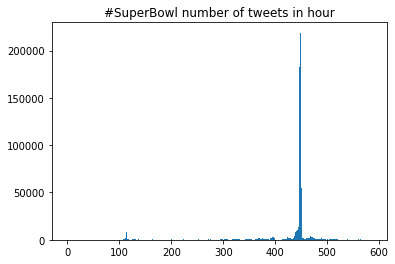

In [ ]:
Superbowl_total_hour = math.ceil((max(Superbowl_time) - min(Superbowl_time))/3600)
Superbowl_tweets = []
for i in range(Superbowl_total_hour):
  start = min(Superbowl_time) +i*3600
  tws = 0
  for time in Superbowl_time:
    if time >=start and time<(start+3600):
      tws +=1
  Superbowl_tweets.append(tws)

plt.figure()
plt.bar(np.arange(0,Superbowl_total_hour,1), Superbowl_tweets, width = 1)
plt.title('#SuperBowl number of tweets in hour')

Text(0.5, 1.0, '#NFL number of tweets in hour')

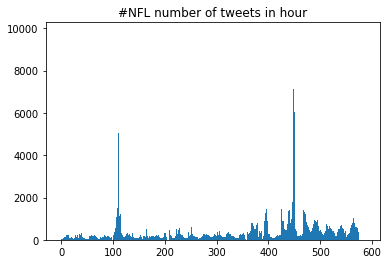

In [ ]:
NFL_total_hour = math.ceil((max(NFL_time) - min(NFL_time))/3600)
NFL_tweets = []
for i in range(NFL_total_hour):
  start = min(NFL_time) +i*3600
  tws = 0
  for time in NFL_time:
    if time >=start and time<start+3600:
      tws +=1
  NFL_tweets.append(tws)

plt.figure()
plt.bar(np.arange(0,NFL_total_hour,1), NFL_tweets, width = 1)
plt.title('#NFL number of tweets in hour')

### Q10

##Part1 Library of Prediction Tasks given a tweet

In [ ]:
Gohawks_str = open('./tweets_#gohawks.txt','r').readlines()

In [ ]:
Gohawks_title = []

for i in range(0,min(4000, len(Gohawks_str))):
  json_object = json.loads(Gohawks_str[i])
  Gohawks_title.append(json_object['title'])

In [ ]:
Gopatriots_str = open('./tweets_#gopatriots.txt','r').readlines()

In [ ]:
Gopatriots_title = []

for i in range(0,min(2000, len(Gopatriots_str))):
  json_object = json.loads(Gopatriots_str[i])
  Gopatriots_title.append(json_object['title'])

In [ ]:
Patriots_str = open('./tweets_#patriots.txt','r').readlines()

In [ ]:
Patriots_title = []

for i in range(0,min(2000, len(Patriots_str))):
  json_object = json.loads(Patriots_str[i])
  Patriots_title.append(json_object['title'])

In [ ]:
# concate three list and assign the team name 
Team_prd = []
for i in range(0,len(Patriots_title)):
  Team_prd.append([Patriots_title[i], 'patriots'])
for i in range(0,len(Gopatriots_title)):
  Team_prd.append([Gopatriots_title[i], 'patriots'])
for i in range(0,len(Gohawks_title)):
  Team_prd.append([Gohawks_title[i], 'hawks'])

Team_data = pd.DataFrame(data=Team_prd, columns=['title', 'team'])

In [ ]:
# check the data
print(Team_data.shape)
Team_data

(8000, 2)


,title,team
0,FRENCH SUPERMARKETS SELL ISLAMIC BOOKS CALL FO...,patriots
1,Do the #Patriots Capture their 4th Ring this y...,patriots
2,Who do you have?!?! #nfl #NFLPlayoffs #Packers...,patriots
3,“@RochieWBZ: Bill Belichick at his last Presse...,patriots
4,RT Obama is a #traitor &amp; committed #treaso...,patriots
...,...,...
7995,If I'm heading to Seattle tomorrow for a busin...,hawks
7996,Everybody has to watch this Sundays game versu...,hawks
7997,"""What do you want me to do? This is important ...",hawks
7998,"""What do you want me to do? This is important ...",hawks


#### Feature Extraction (From project 1)

In [ ]:
import numpy as np
import random
import nltk
np.random.seed(42)
random.seed(42)

In [ ]:
from sklearn.model_selection import train_test_split
df = Team_data
train, test = train_test_split(df, test_size=0.2)
print('number of training sample:', train.shape[0])
print('number of testing sample:', test.shape[0])

number of training sample: 6400
number of testing sample: 1600


In [ ]:
import re
def clean(text):
  text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
  texter = re.sub(r"<br />", " ", text)
  texter = re.sub(r"&quot;", "\"",texter)
  texter = re.sub('&#39;', "\"", texter)
  texter = re.sub('\n', " ", texter)
  texter = re.sub(' u '," you ", texter)
  texter = re.sub('`',"", texter)
  texter = re.sub(' +', ' ', texter)
  texter = re.sub(r"(!)\1+", r"!", texter)
  texter = re.sub(r"(\?)\1+", r"?", texter)
  texter = re.sub('&amp;', 'and', texter)
  texter = re.sub('\r', ' ',texter)
  clean = re.compile('<.*?>')
  texter = texter.encode('ascii', 'ignore').decode('ascii')
  texter = re.sub(clean, '', texter)
  if texter == "":
    texter = ""
  return texter

In [ ]:
nltk.download('stopwords' )
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4') 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
import re
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
import nltk
from nltk import pos_tag
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
import string
from string import punctuation

stop_words_skt = text.ENGLISH_STOP_WORDS
stop_words_en = stopwords.words('english')

In [ ]:
# Clean training set and testing set 
sentences_train = []
for text in train['title']:
    sentences_train.append(clean(text))
print (len(sentences_train))

sentences_test = []
for text in test['title']:
    sentences_test.append(clean(text))
print (len(sentences_test))

vectorizer = CountVectorizer(min_df=3)
X = vectorizer.fit_transform(sentences_train)
X

6400
1600


<6400x2655 sparse matrix of type '<class 'numpy.int64'>'
	with 66199 stored elements in Compressed Sparse Row format>

In [ ]:
wnet = nltk.wordnet.WordNetLemmatizer()
words_list = len(sentences_train)*['']
for i in range(len(sentences_train)):
    for item in sentences_train[i].split():
        if not item.isnumeric(): # exclude numbers
            words_list[i] = words_list[i] + ' ' + wnet.lemmatize(item)

print(len(words_list))

6400


In [ ]:
# stopwords
count_vect = CountVectorizer(stop_words='english', min_df=3, max_df=0.7)
X_train_counts = count_vect.fit_transform(words_list)
X_train_counts.shape

(6400, 2392)

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
print(X_train_tfidf.shape)

(6400, 2392)


In [ ]:
X_test_counts = count_vect.transform(sentences_test)
print(X_test_counts.shape)
X_test_tfidf = tfidf_transformer.fit_transform(X_test_counts)
print(X_test_tfidf.shape)

(1600, 2392)
(1600, 2392)


In [ ]:
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.utils.extmath import randomized_svd

In [ ]:
ratio = 50

Lsi = TruncatedSVD(n_components=50)
Lsi.fit(X_train_tfidf)
X_train_Lsi = Lsi.fit_transform(X_train_tfidf)
X_test_Lsi = Lsi.transform(X_test_tfidf)

u,sigma,vt = randomized_svd(X_train_tfidf,n_components=50,random_state=42)
x_50 = np.dot(np.dot(u,np.diag(sigma)),vt)
Lsi_mse = np.sum(np.square(x_50 - X_train_tfidf))
print("MSE Error of LSI: " + str(Lsi_mse))

MSE Error of LSI: 4461.555527724571


In [ ]:
nmf = NMF(n_components=50, init='random', random_state=42, max_iter=500)
nmf_train = nmf.fit_transform(X_train_tfidf)
nmf_test = nmf.transform(X_test_tfidf)
WH = np.dot(nmf_train, nmf.components_)
nmf_mse =np.sum(np.square(WH-X_train_tfidf))
print("MSE Error of NMF: " + str(nmf_mse))

MSE Error of NMF: 4487.559049259891


#### Classification Algorithm

In [ ]:
!pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

from tempfile import mkdtemp
from shutil import rmtree
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import nltk

In [ ]:
y_train = []
y_test = []
for label in train['team']:
    if label == 'hawks':
        y_train.append(0)
    else:
        y_train.append(1)
for label in test['team']:
    if label == 'hawks':
        y_test.append(0)
    else:
        y_test.append(1)

In [ ]:
hardSVM = svm.SVC(kernel='linear',C=100000,random_state=42)
P_Hard = hardSVM.fit(X_train_Lsi, y_train).predict(X_test_Lsi)

In [ ]:
print("For hard SVM:")
print("Accuracy: ", accuracy_score(y_test,P_Hard))
print("Recall: ", recall_score(y_test,P_Hard))
print("Precision: ", precision_score(y_test,P_Hard))
print("F1-Score: ", f1_score(y_test,P_Hard))

For hard SVM:
Accuracy:  0.996875
Recall:  0.9987562189054726
Precision:  0.9950433705080545
F1-Score:  0.9968963376784605


In [ ]:
Cross_Val = svm.SVC(random_state=42)
param_grid = {'C': [0.001,0.01,0.1,1,10,100,1000,10000,100000,1000000]}
grid = GridSearchCV(Cross_Val,param_grid)
grid.fit(X_train_Lsi,y_train)
pred_cv = grid.best_estimator_.predict(X_test_Lsi)
print("Best parameter (CV score=%0.3f)" % grid.best_score_) 

Best parameter (CV score=0.998)


In [ ]:
print('Best Value of gamma:',grid.best_params_) 
for i in range(len(param_grid['C'])):
    print('Gamma: %s\t, Avg. Validation Accuracy: %s' %(param_grid['C'][i],grid.cv_results_['mean_test_score'][i]))


Best Value of gamma: {'C': 1}
Gamma: 0.001	, Avg. Validation Accuracy: 0.500625
Gamma: 0.01	, Avg. Validation Accuracy: 0.9921875
Gamma: 0.1	, Avg. Validation Accuracy: 0.99765625
Gamma: 1	, Avg. Validation Accuracy: 0.9979687500000001
Gamma: 10	, Avg. Validation Accuracy: 0.9979687500000001
Gamma: 100	, Avg. Validation Accuracy: 0.9979687500000001
Gamma: 1000	, Avg. Validation Accuracy: 0.9979687500000001
Gamma: 10000	, Avg. Validation Accuracy: 0.9979687500000001
Gamma: 100000	, Avg. Validation Accuracy: 0.9979687500000001
Gamma: 1000000	, Avg. Validation Accuracy: 0.9979687500000001


In [ ]:
P_cv = Cross_Val.fit(X_train_Lsi, y_train).predict(X_test_Lsi)
print("Accuracy: ", accuracy_score(y_test,P_cv))
print("Recall: ", recall_score(y_test,P_cv))
print("Precision: " , precision_score(y_test,P_cv))
print("F1-Score: " , f1_score(y_test,P_cv))

Accuracy:  0.995625
Recall:  0.9975124378109452
Precision:  0.9938042131350682
F1-Score:  0.9956548727498449


#### Logistic regression

In [ ]:
logistic_l1 = LogisticRegression(penalty='l1',random_state=42,solver='liblinear')
param_grid = {'C': [0.0001,0.001,0.01,0.1,1,10,100,1000,10000]}
grid_l1 = GridSearchCV(logistic_l1,param_grid,scoring='accuracy')
grid_l1.fit(X_train_Lsi,y_train)
P_logi_l1 = grid_l1.best_estimator_.predict(X_test_Lsi)

In [ ]:
print("L1 logistic regression:")
print('Best Value of gamma:',grid_l1.best_params_) 
print('-'*50)
for i in range(len(param_grid['C'])):
    print('Gamma: %s\t, Avg. Validation Accuracy: %s' %(param_grid['C'][i],grid_l1.cv_results_['mean_test_score'][i]))

L1 logistic regression:
Best Value of gamma: {'C': 10}
--------------------------------------------------
Gamma: 0.0001	, Avg. Validation Accuracy: 0.500625
Gamma: 0.001	, Avg. Validation Accuracy: 0.500625
Gamma: 0.01	, Avg. Validation Accuracy: 0.9953125
Gamma: 0.1	, Avg. Validation Accuracy: 0.9978125
Gamma: 1	, Avg. Validation Accuracy: 0.9978125
Gamma: 10	, Avg. Validation Accuracy: 0.9985937500000001
Gamma: 100	, Avg. Validation Accuracy: 0.9984375
Gamma: 1000	, Avg. Validation Accuracy: 0.99828125
Gamma: 10000	, Avg. Validation Accuracy: 0.9981249999999999


In [ ]:
print("Accuracy: ", accuracy_score(y_test,P_logi_l1))
print("Recall: ", recall_score(y_test,P_logi_l1))
print("Precision: " , precision_score(y_test,P_logi_l1))
print("F1-Score: " , f1_score(y_test,P_logi_l1))

Accuracy:  0.99625
Recall:  0.9987562189054726
Precision:  0.9938118811881188
F1-Score:  0.9962779156327544


In [ ]:
logistic_l2 = LogisticRegression(penalty='l2',random_state=42,solver='liblinear')
param_grid = {'C': [0.0001,0.001,0.01,0.1,1,10,100,1000,10000]}
grid_l2 = GridSearchCV(logistic_l2,param_grid,scoring='accuracy')
grid_l2.fit(X_train_Lsi,y_train)
P_logi_l2 = grid_l2.best_estimator_.predict(X_test_Lsi)

In [ ]:
print("L2 logistic regression:")
print('Best Value of gamma:',grid_l2.best_params_) 
print('-'*50)
for i in range(len(param_grid['C'])):
    print('Gamma: %s\t, Avg. Validation Accuracy: %s' %(param_grid['C'][i],grid_l2.cv_results_['mean_test_score'][i]))

L2 logistic regression:
Best Value of gamma: {'C': 1000}
--------------------------------------------------
Gamma: 0.0001	, Avg. Validation Accuracy: 0.9856250000000001
Gamma: 0.001	, Avg. Validation Accuracy: 0.9887500000000001
Gamma: 0.01	, Avg. Validation Accuracy: 0.9959374999999999
Gamma: 0.1	, Avg. Validation Accuracy: 0.9959374999999999
Gamma: 1	, Avg. Validation Accuracy: 0.99734375
Gamma: 10	, Avg. Validation Accuracy: 0.9978125
Gamma: 100	, Avg. Validation Accuracy: 0.9981249999999999
Gamma: 1000	, Avg. Validation Accuracy: 0.9984375
Gamma: 10000	, Avg. Validation Accuracy: 0.9984375


In [ ]:
print("Accuracy: ", accuracy_score(y_test,P_logi_l2))
print("Recall: ", recall_score(y_test,P_logi_l2))
print("Precision: " , precision_score(y_test,P_logi_l2))
print("F1-Score: " , f1_score(y_test,P_logi_l2))

Accuracy:  0.9975
Recall:  1.0
Precision:  0.995049504950495
F1-Score:  0.9975186104218362


#### Naive Bayes model

In [ ]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(X_train_Lsi, y_train)
P_gaussian = gaussian.predict(X_test_Lsi)

print('Gaussian Naive Bayes:')
print('-'*50)
print("Accuracy :", accuracy_score(y_test,P_gaussian))
print("Recall :", recall_score(y_test,P_gaussian))
print("Precision :", precision_score(y_test,P_gaussian))
print("F1-Score :", f1_score(y_test,P_gaussian))

Gaussian Naive Bayes:
--------------------------------------------------
Accuracy : 0.886875
Recall : 0.8606965174129353
Precision : 0.9093298291721419
F1-Score : 0.8843450479233227


## Part2
correlate these emotions with the score and significant events (such as interceptions or fumbles)? Using these features, can you predict the MVP of the game? Who was the most successful receiver?

In [ ]:

!pip install spacy-langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import datetime
import time



import spacy
from spacy.language import Language
from spacy_langdetect import LanguageDetector

@Language.factory("language_detector")
def get_lang_detector(nlp, name):
   return LanguageDetector()

nlp = spacy.load("en_core_web_sm")
nlp.add_pipe('language_detector', last=True)
print(nlp("This is an english text.")._.language)

{'language': 'en', 'score': 0.9999948560724602}


In [ ]:
from collections import defaultdict

In [ ]:
# game time duration
Game_start = 1422832500.0
Game_end = 1422846900.0

In [ ]:
# Based on the website information, there is in total 11 big events, including 7 touchdowns 
big_event_time =[
    (1422835955, 1422837138),
    (1422837138, 1422838407),
    (1422838407, 1422838707),
    (1422838707, 1422841267),
    (1422841267, 1422841507),
    (1422841507, 1422842339),
    (1422842339, 1422844067),
    (1422844067, 1422845245),
    (1422845245, 1422846305),
    (1422846305, 1422846605),
    (1422846605, 1422846900)]

len(big_event_time)

11

In [ ]:
# player name list
players = {'akeem ayers','alan branch','alvin bailey','b.j. daniels','bobby wagner','brandon bolden','brandon browner',
           'brandon lafell','brian tyms','brock coyle','bruce irvin','bryan stork','bryan walters','byron maxwell',
           'cameron fleming','chandler jones','chris jones','chris matthews','chris white','christine michael',
           'cliff avril','clint gresham','cooper helfet','dan connolly','danny aiken','danny amendola', 'darius fleming',
           'darrelle revis','david king','demarcus dobbs','deshawn shead','devin mccourty',"dont'a hightower",'doug baldwin',
           'duron harmon','earl thomas','j.r. sweezy','james carpenter','james develin','james white','jamie collins',
           'jeremy lane','jermaine kearse','jeron johnson','jimmy garoppolo','joe vellano','jon ryan','jonas gray',
           'jonathan casillas','jordan devey', 'josh boyce','josh fline','julian edelman','justin britt','k.j. wright',
           'kam chancellor','keavon milton' 'kevin norwood','kevin williams','kyle arrington','landon cohen',
           'legarrette blount','lemuel jeanpierre','logan ryan', 'luke wilson','malcolm butler','malcolm smith',
           'marcus burley','marcus cannon','marshawn lynch','matthew slater','max unger','michael bennett',
           'michael hoomanawanui','mike morgan','nate ebner','nate solder',"o'brien schofield",'patrick chung',
           'patrick lewis','ricardo lockette','richard sherman','rob gronkowski','rob ninkovich','robert turbin',
           'russell okung','russell wilson','ryan allen','ryan wendell','sealver siliga','sebastian vollmer',
           'shane vereen','stephen gostkowski','steven hauschka','steven terrell','tarvaris jackson','tavon wilson',
           'tharold simon','tim wright','tom brady','tony mcdaniel','tony moeaki','vince wilfork','will tukuafu',
           'zach moore'}


In [ ]:
Gohawks_readline = open('./tweets_#gohawks.txt','r').readlines()

Gohawks = []

for i in range(0, len(Gohawks_readline)):
  json_object = json.loads(Gohawks_readline[i])
  Gohawks.append(json_object)



In [ ]:
Gopatriots_readline = open('./tweets_#gopatriots.txt','r').readlines()

Gopatriots = []

for i in range(0, len(Gopatriots_readline)):
  json_object = json.loads(Gopatriots_readline[i])
  Gopatriots.append(json_object)

In [ ]:
print(len(Gohawks))
print(len(Gopatriots))


169122
23511


In [ ]:
Gohawks_times, Gohawks_texts = [], []
count = 0
for tw in Gohawks:   
  if Game_start <= tw["citation_date"] <= Game_end:
    if nlp(tw['tweet']['text'])._.language['language'] == 'en':
      count+=1
      print(count)
      Gohawks_times.append(tw["citation_date"])
      Gohawks_texts.append(tw['tweet']['text'])

Streaming output truncated to the last 5000 lines.
20910
20911
20912
20913
20914
20915
20916
20917
20918
20919
20920
20921
20922
20923
20924
20925
20926
20927
20928
20929
20930
20931
20932
20933
20934
20935
20936
20937
20938
20939
20940
20941
20942
20943
20944
20945
20946
20947
20948
20949
20950
20951
20952
20953
20954
20955
20956
20957
20958
20959
20960
20961
20962
20963
20964
20965
20966
20967
20968
20969
20970
20971
20972
20973
20974
20975
20976
20977
20978
20979
20980
20981
20982
20983
20984
20985
20986
20987
20988
20989
20990
20991
20992
20993
20994
20995
20996
20997
20998
20999
21000
21001
21002
21003
21004
21005
21006
21007
21008
21009
21010
21011
21012
21013
21014
21015
21016
21017
21018
21019
21020
21021
21022
21023
21024
21025
21026
21027
21028
21029
21030
21031
21032
21033
21034
21035
21036
21037
21038
21039
21040
21041
21042
21043
21044
21045
21046
21047
21048
21049
21050
21051
21052
21053
21054
21055
21056
21057
21058
21059
21060
21061
21062
21063
21064
21065
21066
21067
2

In [ ]:
Gopatriots_times, Gopatriots_texts = [], []
for tw in Gopatriots:    
  if Game_start <= tw["citation_date"] <= Game_end:
    if nlp(tw['tweet']['text'])._.language['language'] == 'en':
      Gopatriots_times.append(tw["citation_date"])
      Gopatriots_texts.append(tw['tweet']['text'])

In [ ]:
def clean(text):
  temp = text.lower()
  temp = re.sub("'", "", temp) # to avoid removing contractions in english
  temp = re.sub("@[A-Za-z0-9_]+","", temp)
  temp = re.sub("#[A-Za-z0-9_]+","", temp)
  temp = re.sub(r'http\S+', '', temp)
  temp = re.sub('[()!?]', ' ', temp)
  temp = re.sub('\[.*?\]',' ', temp)
  temp = re.sub("[^a-z0-9]"," ", temp)
  temp = temp.split()
  temp = [w for w in temp if not w in stopwords]
  temp = " ".join(word for word in temp)
  
  return temp

def players_dict(texts):
  mentioned_players = defaultdict(list)
  for i, text in enumerate(texts):        
    for word in nlp(text).ents:
      if word.label_ == "PERSON" and word.text in players:
        mentioned_players[word.text].append(i)

  keys = list(mentioned_players.keys())
  counts = []
  for player in keys:
    counts.append(len(mentioned_players[player]))

  return mentioned_players,counts


#### players mentioned in each of 11 big events
######No.1 touchdown P 7: 0 
######No.2 touchdown H 7: 7
######No.3 touchdown P 14: 7
######No.4 touchdown H 14: 14
######No.5 field goal H 14: 17
######No.6 interception H 14: 17
######No.7 touchdown H 14: 24
######No.8 touchdown P 21: 24
######No.9 touchdown P
######No.10 interception P
######No.11  game: P won


###### GoPatriots

In [ ]:
Gopatriots_times_11= [[] for _ in range(11)]
Gopatriots_texts_11 =[[] for _ in range(11)]

for i in range(len(Gopatriots_times)):
  for j in range(11):   
    if big_event_time[j][0] <= Gopatriots_times[i] < big_event_time[j][1]:
        Gopatriots_times_11[j].append(Gopatriots_times[i])
        Gopatriots_texts_11[j].append(Gopatriots_texts[i])

In [ ]:
mentioned_players_gp_11 = [[] for _ in range(11)]
counts_gp_11 = [[] for _ in range(11)]
for k in range(11):
  cleaned_gp_11 = []
  for text in Gopatriots_texts_11[k]:
    cleaned_gp_11.append(clean(text))
  mentioned_players_gp_11[k],counts_gp_11[k] = players_dict(cleaned_gp_11)

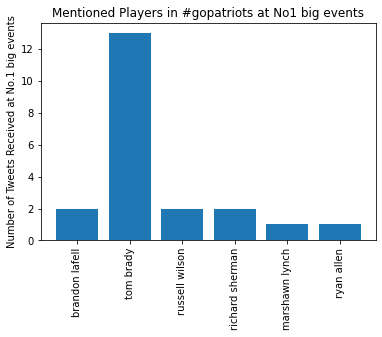

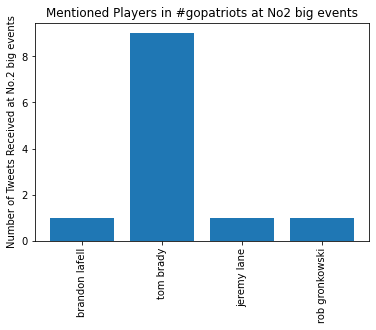

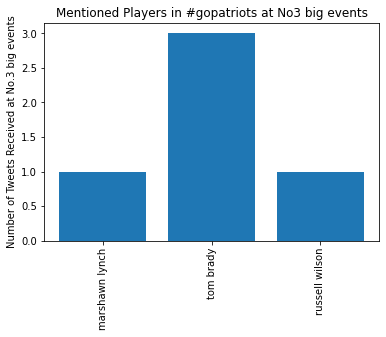

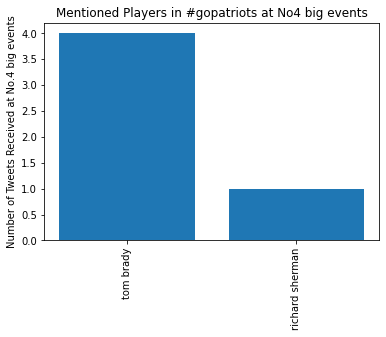

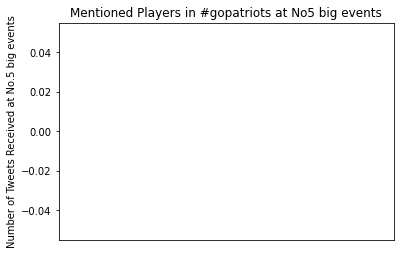

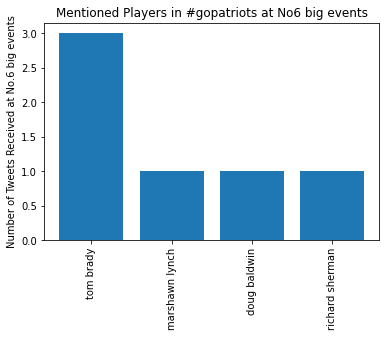

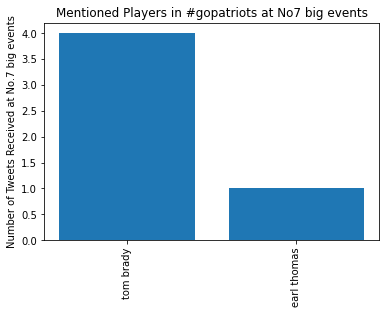

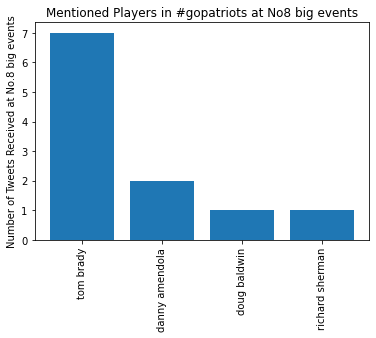

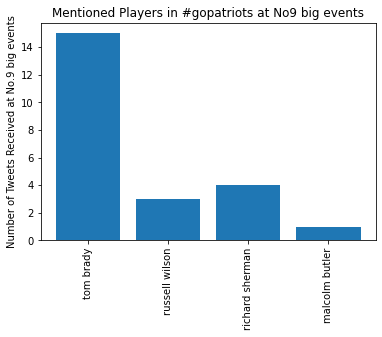

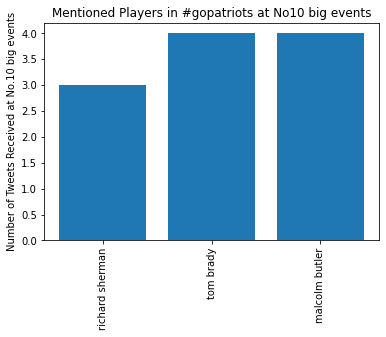

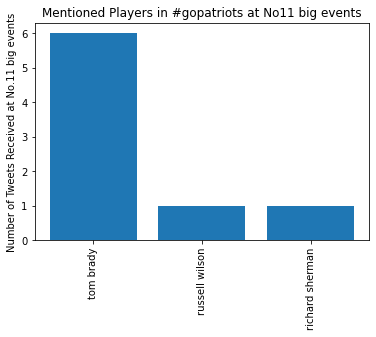

In [ ]:
for k in range(11):
  plt.figure()
  ax = plt.axes()
  plt.bar(np.arange(len(counts_gp_11[k])), counts_gp_11[k])
  plt.xticks(rotation = 90)
  ax.set_xticks(np.arange(len(counts_gp_11[k])))
  ax.set_xticklabels(list(mentioned_players_gp_11[k].keys()))
  ax.set_ylabel(f"Number of Tweets Received at No.{k+1} big events")
  plt.title(f"Mentioned Players in #gopatriots at No{k+1} big events")
  plt.show()


In [ ]:
cleaned_Gopatriots_texts = []
for text in Gopatriots_texts:
  cleaned_Gopatriots_texts.append(clean(text))

In [ ]:
mentioned_players_gp,counts_gp = players_dict(cleaned_Gopatriots_texts)

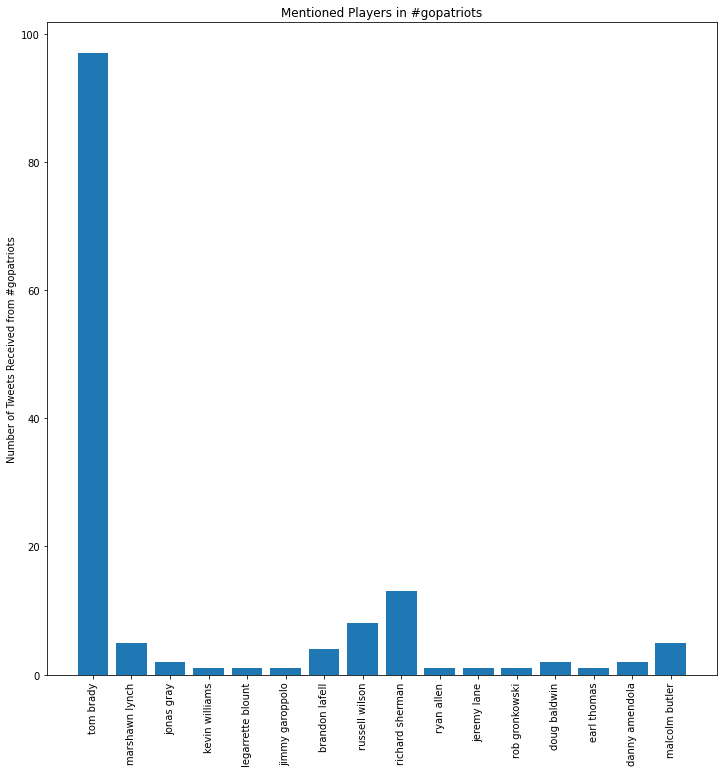

In [ ]:

plt.figure(figsize=(12, 12))
ax = plt.axes()
plt.bar(np.arange(len(counts_gp)), counts_gp)
plt.xticks(rotation = 90)
ax.set_xticks(np.arange(len(counts_gp)))
ax.set_xticklabels(list(mentioned_players_gp.keys()))
ax.set_ylabel("Number of Tweets Received from #gopatriots")
plt.title("Mentioned Players in #gopatriots")
plt.show()


In [ ]:
mentioned_gp_df = pd.DataFrame()
mentioned_gp_df['player'] = list(mentioned_players_gp.keys())
mentioned_gp_df['mentioned times'] = counts_gp
mentioned_gp_df.sort_values('mentioned times', ascending=False)

,player,mentioned times
0,tom brady,97
8,richard sherman,13
7,russell wilson,8
1,marshawn lynch,5
15,malcolm butler,5
6,brandon lafell,4
2,jonas gray,2
12,doug baldwin,2
14,danny amendola,2
3,kevin williams,1


In [ ]:
len(Gopatriots_times)

6968

In total 6968 tweets from #GoPatriots, we got 97 tweets mentioned the exact name of Tom Brady

#### GoHawks

In [ ]:
cleaned_Gohawks_texts = []
for text in Gohawks_texts:
  cleaned_Gohawks_texts.append(clean(text))

In [ ]:
Gohawks_times_11= [[] for _ in range(11)]
Gohawks_texts_11 =[[] for _ in range(11)]

for i in range(len(Gohawks_times)):
  for j in range(11):   
    if big_event_time[j][0] <= Gohawks_times[i] < big_event_time[j][1]:
        Gohawks_times_11[j].append(Gohawks_times[i])
        Gohawks_texts_11[j].append(Gohawks_texts[i])

In [ ]:
mentioned_players_gb_11 = [[] for _ in range(11)]
counts_gb_11 = [[] for _ in range(11)]
for k in range(11):
  cleaned_gb_11 = []
  for text in Gohawks_texts_11[k]:
    cleaned_gb_11.append(clean(text))
  mentioned_players_gb_11[k],counts_gb_11[k] = players_dict(cleaned_gb_11)

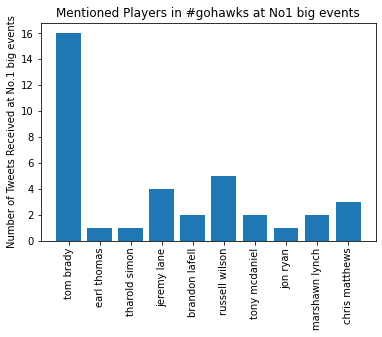

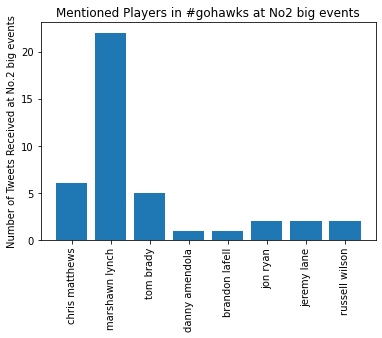

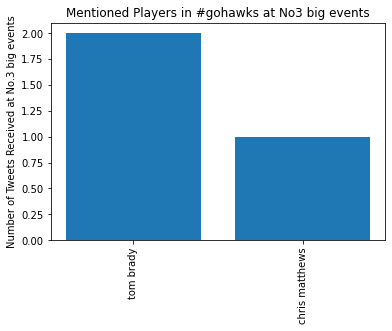

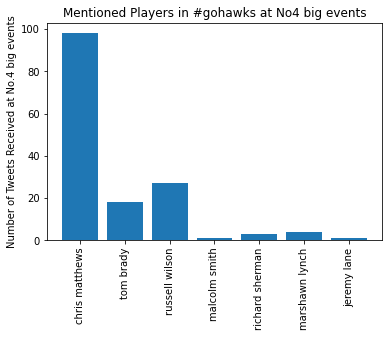

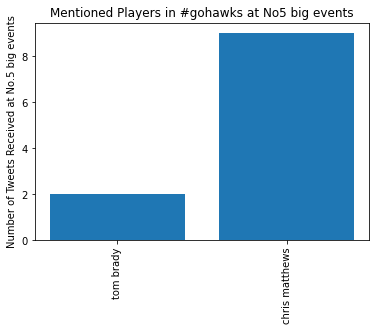

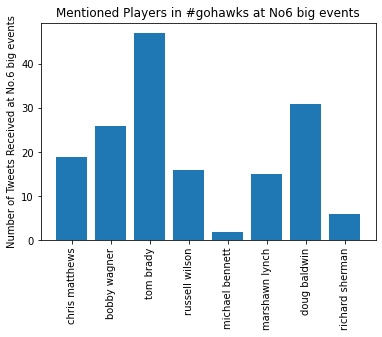

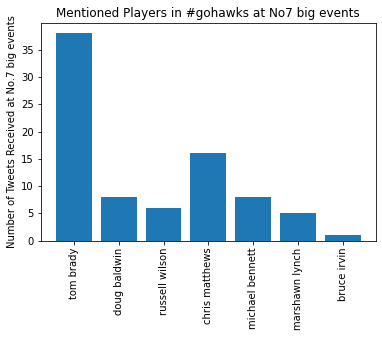

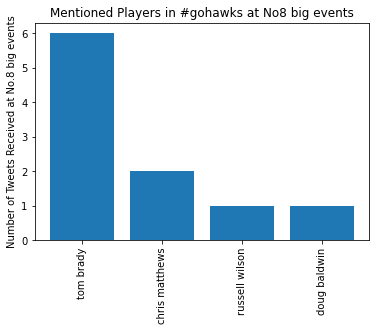

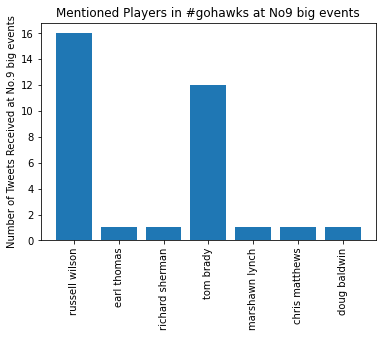

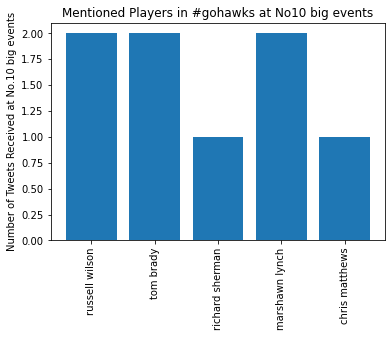

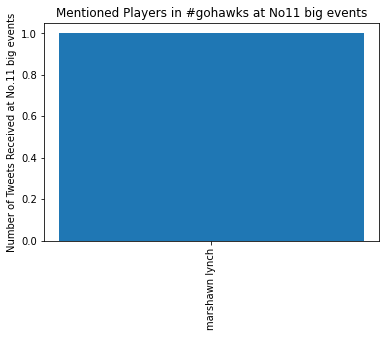

In [ ]:
for k in range(11):
  plt.figure()
  ax = plt.axes()
  plt.bar(np.arange(len(counts_gb_11[k])), counts_gb_11[k])
  plt.xticks(rotation = 90)
  ax.set_xticks(np.arange(len(counts_gb_11[k])))
  ax.set_xticklabels(list(mentioned_players_gb_11[k].keys()))
  ax.set_ylabel(f"Number of Tweets Received at No.{k+1} big events")
  plt.title(f"Mentioned Players in #gohawks at No{k+1} big events")
  plt.show()


These plots is mostly correlated with the 11 big events 

In [ ]:
cleaned_Gohawks_texts = []
for text in Gohawks_texts:
  cleaned_Gohawks_texts.append(clean(text))

In [ ]:
mentioned_players_gb,counts = players_dict(cleaned_Gohawks_texts)

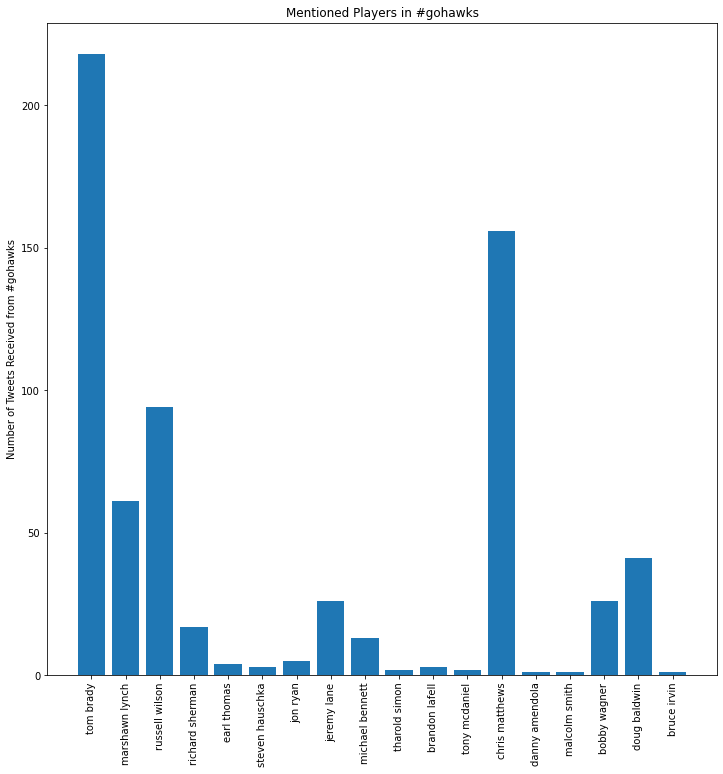

In [ ]:

plt.figure(figsize=(12, 12))
ax = plt.axes()
plt.bar(np.arange(len(counts)), counts)
plt.xticks(rotation = 90)
ax.set_xticks(np.arange(len(counts)))
ax.set_xticklabels(list(mentioned_players_gb.keys()))
ax.set_ylabel("Number of Tweets Received from #gohawks")
plt.title("Mentioned Players in #gohawks")
plt.show()


In [ ]:
mentioned_gh_df = pd.DataFrame()
mentioned_gh_df['player'] = list(mentioned_players_gb.keys())
mentioned_gh_df['mentioned times'] = counts
mentioned_gh_df.sort_values('mentioned times', ascending=False)

,player,mentioned times
0,tom brady,218
12,chris matthews,156
2,russell wilson,94
1,marshawn lynch,61
16,doug baldwin,41
15,bobby wagner,26
7,jeremy lane,26
3,richard sherman,17
8,michael bennett,13
6,jon ryan,5


In [ ]:
len(Gohawks_times)

25909

From 25909 tweets from #GoHawks, we can get 218 mentioned Tom Brady

Based on the data above, we can combine both of two hashtag and tell that Tom Brady is most mentioned players, so we can predict he became the MVP 